In [22]:
from tabulate import tabulate

def calculate_depreciation(method, cost, salvage, life, units_produced=None, total_units=None):
    depreciation_per_year = []
    
    if method == 1:  # Straight-Line Method
        annual_depreciation = (cost - salvage) / life
        depreciation_per_year = [annual_depreciation] * life
    elif method == 2:  # Declining Balance Method
        book_value = cost
        rate = 2 / life
        for year in range(1, life + 1):
            depreciation = book_value * rate
            # Ensure depreciation does not exceed book value - salvage value
            depreciation = min(depreciation, book_value - salvage)
            depreciation_per_year.append(depreciation)
            book_value -= depreciation
    elif method == 3 and units_produced and total_units:  # Units of Production Method
        annual_depreciation = (cost - salvage) * (units_produced / total_units)
        depreciation_per_year = [annual_depreciation] * life
    elif method == 4:  # Sum-of-the-Years-Digits Method
        years = list(range(1, life + 1))
        total = sum(years)
        annual_depreciation = (cost - salvage) * (life / total)
        depreciation_per_year = [annual_depreciation] * life
    elif method == 5:  # Double Declining Balance Method
        book_value = cost
        rate = 2 / life
        for year in range(1, life + 1):
            depreciation = book_value * rate
            # Ensure depreciation does not exceed book value - salvage value
            depreciation = min(depreciation, book_value - salvage)
            depreciation_per_year.append(depreciation)
            book_value -= depreciation
    else:
        return "Invalid input"
    
    # Calculate depreciation per month (for each year)
    depreciation_per_month = [dep / 12 for dep in depreciation_per_year]
    
    return depreciation_per_year, depreciation_per_month

# Example usage:
print("Depreciation Calculator")

# User selects method by entering a number
print("Select Depreciation Method:")
print("1: Straight-Line")
print("2: Declining Balance")
print("3: Units of Production")
print("4: Sum-of-the-Years-Digits")
print("5: Double Declining Balance")

method = int(input("Enter the number corresponding to the chosen depreciation method: "))
cost = float(input("Enter the machinery cost: "))
salvage = float(input("Enter the salvage value: "))
life = int(input("Enter the useful life of the asset (in years): "))

# For Units of Production, additional inputs are needed
if method == 3:
    units_produced = float(input("Enter the units produced this year: "))
    total_units = float(input("Enter the total estimated units to be produced over the asset's life: "))
    depreciation_per_year, depreciation_per_month = calculate_depreciation(method, cost, salvage, life, units_produced, total_units)
else:
    depreciation_per_year, depreciation_per_month = calculate_depreciation(method, cost, salvage, life)

# Prepare data for table
years = [f"Year {i+1}" for i in range(life)]
table = []
for i in range(life):
    table.append([years[i], depreciation_per_year[i], depreciation_per_month[i]])

# Display results in tabular format
print("\nDepreciation Table:")
headers = ["Year", "Depreciation per Year (INR)", "Depreciation per Month (INR)"]
print(tabulate(table, headers=headers, tablefmt="grid"))


Depreciation Calculator
Select Depreciation Method:
1: Straight-Line
2: Declining Balance
3: Units of Production
4: Sum-of-the-Years-Digits
5: Double Declining Balance


Enter the number corresponding to the chosen depreciation method:  2
Enter the machinery cost:  1000000
Enter the salvage value:  100000
Enter the useful life of the asset (in years):  5



Depreciation Table:
+--------+-------------------------------+--------------------------------+
| Year   |   Depreciation per Year (INR) |   Depreciation per Month (INR) |
+========+===============================+================================+
| Year 1 |                        400000 |                       33333.3  |
+--------+-------------------------------+--------------------------------+
| Year 2 |                        240000 |                       20000    |
+--------+-------------------------------+--------------------------------+
| Year 3 |                        144000 |                       12000    |
+--------+-------------------------------+--------------------------------+
| Year 4 |                         86400 |                        7200    |
+--------+-------------------------------+--------------------------------+
| Year 5 |                         29600 |                        2466.67 |
+--------+-------------------------------+-------------------------

In [24]:
def calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost):
    # Apply cost estimation methods
    if method == "Fixed":
        return base_cost + overhead_cost + depreciation_cost
    elif method == "Variable":
        return labor_cost + material_cost + machinery_cost + fuel_cost + maintenance_cost + transportation_cost
    elif method == "Semi-variable":
        return base_cost + (labor_cost + material_cost + machinery_cost + fuel_cost + maintenance_cost + transportation_cost) / 2 + overhead_cost + depreciation_cost
    else:
        return "Invalid method"

# Example usage with user input:
method = input("Enter Cost Estimation Method (Fixed / Variable / Semi-variable): ")
base_cost = float(input("Enter the base cost (in your currency): "))
labor_cost = float(input("Enter the labor cost (in your currency): "))
material_cost = float(input("Enter the material cost (in your currency): "))
machinery_cost = float(input("Enter the machinery cost (in your currency): "))
fuel_cost = float(input("Enter the fuel cost (in your currency): "))
maintenance_cost = float(input("Enter the maintenance cost (in your currency): "))
overhead_cost = float(input("Enter the overhead cost (in your currency): "))
environmental_cost = float(input("Enter the environmental impact cost (in your currency): "))
transportation_cost = float(input("Enter the transportation cost (in your currency): "))
depreciation_cost = float(input("Enter the depreciation cost of machinery (in your currency): "))

cost_estimation_value = calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost)
print(f"Total Estimated Cost: {cost_estimation_value}")


Enter Cost Estimation Method (Fixed / Variable / Semi-variable):  Fixed 
Enter the base cost (in your currency):  10000
Enter the labor cost (in your currency):  100
Enter the material cost (in your currency):  100
Enter the machinery cost (in your currency):  100000
Enter the fuel cost (in your currency):  1000
Enter the maintenance cost (in your currency):  10000
Enter the overhead cost (in your currency):  10000
Enter the environmental impact cost (in your currency):  100000
Enter the transportation cost (in your currency):  10000
Enter the depreciation cost of machinery (in your currency):  10000000


Total Estimated Cost: Invalid method


In [26]:
def calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost, variable_costs):
    """
    Calculate the total cost estimation based on the provided method and costs.
    
    Parameters:
    - method: The cost estimation method (Fixed, Variable, or Semi-variable).
    - base_cost: Initial cost before considering variable and fixed components.
    - labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost: Individual cost components.
    - variable_costs: List of additional variable costs.
    
    Returns:
    - The total estimated cost.
    """
    # Sum up the fixed components and variables
    total_fixed_costs = base_cost + overhead_cost + depreciation_cost
    total_variable_costs = labor_cost + material_cost + machinery_cost + fuel_cost + maintenance_cost + transportation_cost + environmental_cost + sum(variable_costs)
    
    # Apply cost estimation methods
    if method == "Fixed":
        return total_fixed_costs
    elif method == "Variable":
        return total_variable_costs
    elif method == "Semi-variable":
        return total_fixed_costs + total_variable_costs / 2
    else:
        return "Invalid method"

# Example usage with user input:
def main():
    print("Cost Estimation Calculator for Mining Operations")
    
    # Fixed Costs
    base_cost = float(input("Enter the base cost (in your currency): "))
    overhead_cost = float(input("Enter the overhead cost (in your currency): "))
    depreciation_cost = float(input("Enter the depreciation cost of machinery (in your currency): "))
    environmental_cost = float(input("Enter the environmental impact cost (in your currency): "))
    transportation_cost = float(input("Enter the transportation cost (in your currency): "))
    
    # Variable Costs
    variable_costs = []
    num_variable_costs = int(input("Enter the number of variable costs (max 20): "))
    
    for i in range(num_variable_costs):
        variable_cost = float(input(f"Enter variable cost {i+1} (in your currency): "))
        variable_costs.append(variable_cost)
    
    # Costs related to Mining Operations
    labor_cost = float(input("Enter the labor cost (in your currency): "))
    material_cost = float(input("Enter the material cost (in your currency): "))
    machinery_cost = float(input("Enter the machinery cost (in your currency): "))
    fuel_cost = float(input("Enter the fuel cost (in your currency): "))
    maintenance_cost = float(input("Enter the maintenance cost (in your currency): "))
    
    # Cost Estimation Method
    method = input("Enter Cost Estimation Method (Fixed / Variable / Semi-variable): ")
    
    # Calculate and display total cost estimation
    cost_estimation_value = calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost, variable_costs)
    print(f"Total Estimated Cost: {coiuyst_estimation_value}")
    
if __name__ == "__main__":
    main()iuyf


Cost Estimation Calculator for Mining Operations


Enter the base cost (in your currency):  iouy


ValueError: could not convert string to float: 'iouy'

In [27]:
def calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost, variable_costs):
    """
    Calculate the total cost estimation based on the provided method and costs.
    
    Parameters:
    - method: The cost estimation method (Fixed, Variable, or Semi-variable).
    - base_cost: Initial cost before considering variable and fixed components.
    - labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost: Individual cost components.
    - variable_costs: List of additional variable costs.
    
    Returns:
    - The total estimated cost.
    """
    # Sum up the fixed components and variables
    total_fixed_costs = base_cost + overhead_cost + depreciation_cost
    total_variable_costs = labor_cost + material_cost + machinery_cost + fuel_cost + maintenance_cost + transportation_cost + environmental_cost + sum(variable_costs)
    
    # Apply cost estimation methods
    if method == "Fixed":
        return total_fixed_costs
    elif method == "Variable":
        return total_variable_costs
    elif method == "Semi-variable":
        return total_fixed_costs + total_variable_costs / 2
    else:
        return "Invalid method"

# Example usage with user input:
def main():
    print("Cost Estimation Calculator for Mining Operations")
    
    # Fixed Costs
    base_cost = float(input("Enter the base cost: "))
    overhead_cost = float(input("Enter the overhead cost: "))
    depreciation_cost = float(input("Enter the depreciation cost of machinery: "))
    environmental_cost = float(input("Enter the environmental impact cost: "))
    transportation_cost = float(input("Enter the transportation cost: "))
    
    # Variable Costs
    variable_costs = []
    num_variable_costs = int(input("Enter the number of variable costs (max 20): "))
    
    for i in range(num_variable_costs):
        variable_cost = float(input(f"Enter variable cost {i+1}: "))
        variable_costs.append(variable_cost)
    
    # Costs related to Mining Operations
    labor_cost = float(input("Enter the labor cost: "))
    material_cost = float(input("Enter the material cost: "))
    machinery_cost = float(input("Enter the machinery cost: "))
    fuel_cost = float(input("Enter the fuel cost: "))
    maintenance_cost = float(input("Enter the maintenance cost: "))
    
    # Cost Estimation Method
    method = input("Enter Cost Estimation Method (Fixed / Variable / Semi-variable): ")
    
    # Calculate and display total cost estimation
    cost_estimation_value = calculate_cost_estimation(method, base_cost, labor_cost, material_cost, machinery_cost, fuel_cost, maintenance_cost, overhead_cost, environmental_cost, transportation_cost, depreciation_cost, variable_costs)
    print(f"Total Estimated Cost: {cost_estimation_value}")
    
if __name__ == "__main__":
    main()


Cost Estimation Calculator for Mining Operations


Enter the base cost:  10000
Enter the overhead cost:  10000
Enter the depreciation cost of machinery:  1000
Enter the environmental impact cost:  10
Enter the transportation cost:  10
Enter the number of variable costs (max 20):  1
Enter variable cost 1:  10
Enter the labor cost:  1000
Enter the material cost:  100
Enter the machinery cost:  1000
Enter the fuel cost:  90
Enter the maintenance cost:  90
Enter Cost Estimation Method (Fixed / Variable / Semi-variable):  Fixed 


Total Estimated Cost: Invalid method


## Paisa Raise karne ki baat kar rha tha 

In [28]:
class FundRaising:
    def __init__(self, company_name, project_cost):
        self.company_name = company_name
        self.project_cost = project_cost
        self.funds_raised = 0

    def ipo(self, ipo_price_per_share, shares_to_issue):
        # IPO method to raise funds
        raised = ipo_price_per_share * shares_to_issue
        self.funds_raised += raised
        print(f"Raised funds through IPO: {raised} INR")
        return raised

    def private_equity(self, equity_percentage, investment_amount):
        # Private Equity method to raise funds
        raised = investment_amount * (equity_percentage / 100)
        self.funds_raised += raised
        print(f"Raised funds through Private Equity: {raised} INR")
        return raised

    def debt(self, loan_amount, interest_rate, years):
        # Debt method to raise funds
        # Assuming simple interest for simplicity
        interest = (loan_amount * interest_rate * years) / 100
        total_repayment = loan_amount + interest
        self.funds_raised += loan_amount
        print(f"Raised funds through Debt: {loan_amount} INR with total repayment of {total_repayment} INR")
        return loan_amount

    def preference_shares(self, number_of_shares, price_per_share):
        # Preference Shares method to raise funds
        raised = number_of_shares * price_per_share
        self.funds_raised += raised
        print(f"Raised funds through Preference Shares: {raised} INR")
        return raised

    def display_funds_raised(self):
        print(f"\nTotal funds raised for {self.company_name}'s mining operation: {self.funds_raised} INR")
        remaining_funds = self.project_cost - self.funds_raised
        if remaining_funds > 0:
            print(f"Remaining funds required: {remaining_funds} INR")
        else:
            print(f"Funds raised are sufficient to cover the project cost!")

# Function to simulate the fund-raising process
def main():
    company_name = input("Enter the company name: ")
    project_cost = float(input("Enter the total project cost (INR): "))
    
    # Initialize the FundRaising class
    fund_raising = FundRaising(company_name, project_cost)
    
    # Select financing method(s)
    while fund_raising.funds_raised < project_cost:
        print("\nSelect a method to raise funds:")
        print("1. IPO")
        print("2. Private Equity")
        print("3. Debt")
        print("4. Preference Shares")
        method_choice = int(input("Enter your choice (1-4): "))
        
        if method_choice == 1:  # IPO
            ipo_price_per_share = float(input("Enter IPO price per share (INR): "))
            shares_to_issue = int(input("Enter number of shares to issue: "))
            fund_raising.ipo(ipo_price_per_share, shares_to_issue)
        
        elif method_choice == 2:  # Private Equity
            equity_percentage = float(input("Enter the percentage of equity to offer: "))
            investment_amount = float(input("Enter the total investment amount (INR): "))
            fund_raising.private_equity(equity_percentage, investment_amount)
        
        elif method_choice == 3:  # Debt
            loan_amount = float(input("Enter loan amount (INR): "))
            interest_rate = float(input("Enter interest rate (%): "))
            years = int(input("Enter loan tenure in years: "))
            fund_raising.debt(loan_amount, interest_rate, years)
        
        elif method_choice == 4:  # Preference Shares
            number_of_shares = int(input("Enter number of preference shares to issue: "))
            price_per_share = float(input("Enter price per preference share (INR): "))
            fund_raising.preference_shares(number_of_shares, price_per_share)
        
        else:
            print("Invalid choice, please try again.")
        
        fund_raising.display_funds_raised()

    print("\nFunding process complete!")

# Run the main function
if __name__ == "__main__":
    main()


Enter the company name:  ABC limited
Enter the total project cost (INR):  10000000



Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  1
Enter IPO price per share (INR):  400
Enter number of shares to issue:  20000


Raised funds through IPO: 8000000.0 INR

Total funds raised for ABC limited's mining operation: 8000000.0 INR
Remaining funds required: 2000000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  3
Enter loan amount (INR):  4000000
Enter interest rate (%):  10
Enter loan tenure in years:  15


Raised funds through Debt: 4000000.0 INR with total repayment of 10000000.0 INR

Total funds raised for ABC limited's mining operation: 12000000.0 INR
Funds raised are sufficient to cover the project cost!

Funding process complete!


Enter the company name:  and
Enter the total project cost (INR):  100000



Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  1
Enter IPO price per share (INR):  1000
Enter number of shares to issue:  30


Raised funds through IPO: 30000.0 INR

Total funds raised for and's mining operation: 30000.0 INR
Remaining funds required: 70000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  3
Enter loan amount (INR):  40000
Enter interest rate (%):  10
Enter loan tenure in years:  4



Raised funds through Debt: 40000.0 INR with EMI of 1014.50 INR per month for 48 months.
Total repayment over 4 years: 48696.16 INR

Total funds raised for and's mining operation: 70000.0 INR
Remaining funds required: 30000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  2
Enter the percentage of equity to offer:  30
Enter the total investment amount (INR):  30000


Raised funds through Private Equity: 9000.0 INR

Total funds raised for and's mining operation: 79000.0 INR
Remaining funds required: 21000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  4
Enter number of preference shares to issue:  70
Enter price per preference share (INR):  300


Raised funds through Preference Shares: 21000.0 INR

Total funds raised for and's mining operation: 100000.0 INR
Funds raised are sufficient to cover the project cost!

Funding process complete!


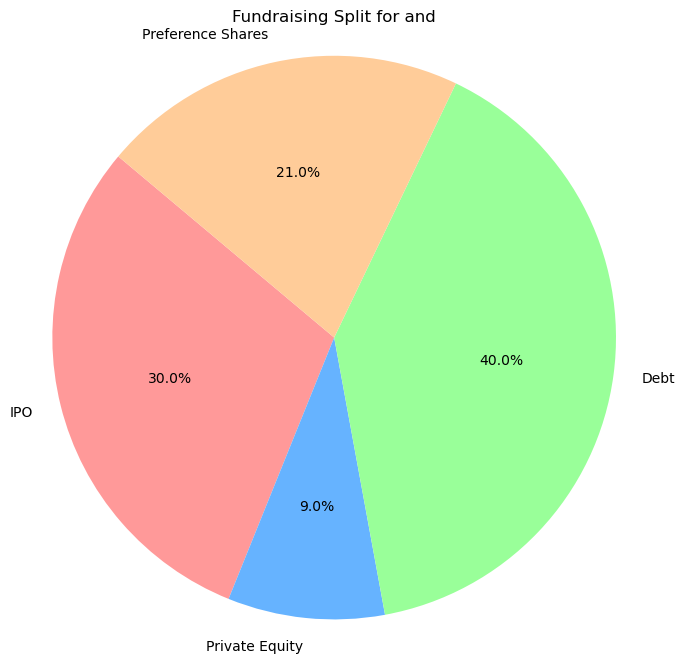

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

class FundRaising:
    def __init__(self, company_name, project_cost):
        self.company_name = company_name
        self.project_cost = project_cost
        self.funds_raised = 0
        self.fund_sources = {'IPO': 0, 'Private Equity': 0, 'Debt': 0, 'Preference Shares': 0}

    def ipo(self, ipo_price_per_share, shares_to_issue):
        # IPO method to raise funds
        raised = ipo_price_per_share * shares_to_issue
        self.funds_raised += raised
        self.fund_sources['IPO'] += raised
        print(f"Raised funds through IPO: {raised} INR")
        return raised

    def private_equity(self, equity_percentage, investment_amount):
        # Private Equity method to raise funds
        raised = investment_amount * (equity_percentage / 100)
        self.funds_raised += raised
        self.fund_sources['Private Equity'] += raised
        print(f"Raised funds through Private Equity: {raised} INR")
        return raised

    def debt(self, loan_amount, interest_rate, years):
        # Debt method to raise funds and calculate EMI
        interest_rate_monthly = (interest_rate / 100) / 12
        n = years * 12  # Number of months

        emi = (loan_amount * interest_rate_monthly * (1 + interest_rate_monthly) ** n) / ((1 + interest_rate_monthly) ** n - 1)

        total_repayment = emi * n
        self.funds_raised += loan_amount
        self.fund_sources['Debt'] += loan_amount

        print(f"\nRaised funds through Debt: {loan_amount} INR with EMI of {emi:.2f} INR per month for {n} months.")
        print(f"Total repayment over {years} years: {total_repayment:.2f} INR")
        return loan_amount

    def preference_shares(self, number_of_shares, price_per_share):
        # Preference Shares method to raise funds
        raised = number_of_shares * price_per_share
        self.funds_raised += raised
        self.fund_sources['Preference Shares'] += raised
        print(f"Raised funds through Preference Shares: {raised} INR")
        return raised

    def display_funds_raised(self):
        print(f"\nTotal funds raised for {self.company_name}'s mining operation: {self.funds_raised} INR")
        remaining_funds = self.project_cost - self.funds_raised
        if remaining_funds > 0:
            print(f"Remaining funds required: {remaining_funds} INR")
        else:
            print(f"Funds raised are sufficient to cover the project cost!")

    def plot_fund_split(self):
        # Plotting the fund sources as a pie chart
        labels = self.fund_sources.keys()
        values = self.fund_sources.values()

        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
        plt.title(f"Fundraising Split for {self.company_name}")
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
        plt.show()

# Function to simulate the fund-raising process
def main():
    company_name = input("Enter the company name: ")
    project_cost = float(input("Enter the total project cost (INR): "))
    
    # Initialize the FundRaising class
    fund_raising = FundRaising(company_name, project_cost)
    
    # Select financing method(s)
    while fund_raising.funds_raised < project_cost:
        print("\nSelect a method to raise funds:")
        print("1. IPO")
        print("2. Private Equity")
        print("3. Debt")
        print("4. Preference Shares")
        method_choice = int(input("Enter your choice (1-4): "))
        
        if method_choice == 1:  # IPO
            ipo_price_per_share = float(input("Enter IPO price per share (INR): "))
            shares_to_issue = int(input("Enter number of shares to issue: "))
            fund_raising.ipo(ipo_price_per_share, shares_to_issue)
        
        elif method_choice == 2:  # Private Equity
            equity_percentage = float(input("Enter the percentage of equity to offer: "))
            investment_amount = float(input("Enter the total investment amount (INR): "))
            fund_raising.private_equity(equity_percentage, investment_amount)
        
        elif method_choice == 3:  # Debt
            loan_amount = float(input("Enter loan amount (INR): "))
            interest_rate = float(input("Enter interest rate (%): "))
            years = int(input("Enter loan tenure in years: "))
            fund_raising.debt(loan_amount, interest_rate, years)
        
        elif method_choice == 4:  # Preference Shares
            number_of_shares = int(input("Enter number of preference shares to issue: "))
            price_per_share = float(input("Enter price per preference share (INR): "))
            fund_raising.preference_shares(number_of_shares, price_per_share)
        
        else:
            print("Invalid choice, please try again.")
        
        fund_raising.display_funds_raised()

    print("\nFunding process complete!")
    fund_raising.plot_fund_split()

# Run the main function
if __name__ == "__main__":
    main()


Enter the company name:  k
Enter the total project cost (INR):  10000



Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  1
Enter IPO price per share (INR):  2
Enter number of shares to issue:  1000


Raised funds through IPO: 2000.0 INR

Total funds raised for k's mining operation: 2000.0 INR
Remaining funds required: 8000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  2
Enter the percentage of equity to offer:  30
Enter the total investment amount (INR):  10000


Raised funds through Private Equity: 3000.0 INR

Total funds raised for k's mining operation: 5000.0 INR
Remaining funds required: 5000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  3
Enter loan amount (INR):  3000
Enter interest rate (%):  10
Enter loan tenure in years:  2



Raised funds through Debt: 3000.0 INR with EMI of 138.43 INR per month for 24 months.
Total repayment over 2 years: 3322.43 INR

Total funds raised for k's mining operation: 8000.0 INR
Remaining funds required: 2000.0 INR

Select a method to raise funds:
1. IPO
2. Private Equity
3. Debt
4. Preference Shares


Enter your choice (1-4):  3
Enter loan amount (INR):  2000
Enter interest rate (%):  10
Enter loan tenure in years:  2



Raised funds through Debt: 2000.0 INR with EMI of 92.29 INR per month for 24 months.
Total repayment over 2 years: 2214.96 INR

Total funds raised for k's mining operation: 10000.0 INR
Funds raised are sufficient to cover the project cost!

Funding process complete!


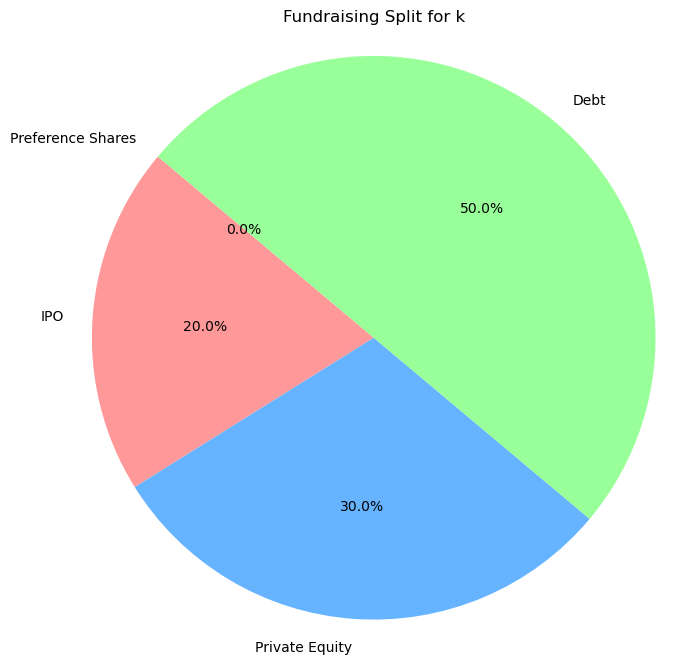


Funds Raised by Source:
              Source  Funds Raised (INR)
0                IPO              2000.0
1     Private Equity              3000.0
2               Debt              5000.0
3  Preference Shares                 0.0


In [34]:
import matplotlib.pyplot as plt
import pandas as pd

class FundRaising:
    def __init__(self, company_name, project_cost):
        self.company_name = company_name
        self.project_cost = project_cost
        self.funds_raised = 0
        self.fund_sources = {'IPO': 0, 'Private Equity': 0, 'Debt': 0, 'Preference Shares': 0}

    def ipo(self, ipo_price_per_share, shares_to_issue):
        # IPO method to raise funds
        raised = ipo_price_per_share * shares_to_issue
        self.funds_raised += raised
        self.fund_sources['IPO'] += raised
        print(f"Raised funds through IPO: {raised} INR")
        return raised

    def private_equity(self, equity_percentage, investment_amount):
        # Private Equity method to raise funds
        raised = investment_amount * (equity_percentage / 100)
        self.funds_raised += raised
        self.fund_sources['Private Equity'] += raised
        print(f"Raised funds through Private Equity: {raised} INR")
        return raised

    def debt(self, loan_amount, interest_rate, years):
        # Debt method to raise funds and calculate EMI
        interest_rate_monthly = (interest_rate / 100) / 12
        n = years * 12  # Number of months

        emi = (loan_amount * interest_rate_monthly * (1 + interest_rate_monthly) ** n) / ((1 + interest_rate_monthly) ** n - 1)

        total_repayment = emi * n
        self.funds_raised += loan_amount
        self.fund_sources['Debt'] += loan_amount

        print(f"\nRaised funds through Debt: {loan_amount} INR with EMI of {emi:.2f} INR per month for {n} months.")
        print(f"Total repayment over {years} years: {total_repayment:.2f} INR")
        return loan_amount

    def preference_shares(self, number_of_shares, price_per_share):
        # Preference Shares method to raise funds
        raised = number_of_shares * price_per_share
        self.funds_raised += raised
        self.fund_sources['Preference Shares'] += raised
        print(f"Raised funds through Preference Shares: {raised} INR")
        return raised

    def display_funds_raised(self):
        print(f"\nTotal funds raised for {self.company_name}'s mining operation: {self.funds_raised} INR")
        remaining_funds = self.project_cost - self.funds_raised
        if remaining_funds > 0:
            print(f"Remaining funds required: {remaining_funds} INR")
        else:
            print(f"Funds raised are sufficient to cover the project cost!")

    def plot_fund_split(self):
        # Plotting the fund sources as a pie chart
        labels = self.fund_sources.keys()
        values = self.fund_sources.values()

        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
        plt.title(f"Fundraising Split for {self.company_name}")
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
        plt.show()

    def display_table(self):
        # Display the fund sources in tabular format using pandas DataFrame
        data = {
            'Source': list(self.fund_sources.keys()),
            'Funds Raised (INR)': list(self.fund_sources.values())
        }
        df = pd.DataFrame(data)
        print("\nFunds Raised by Source:")
        print(df)

# Function to simulate the fund-raising process
def main():
    company_name = input("Enter the company name: ")
    project_cost = float(input("Enter the total project cost (INR): "))
    
    # Initialize the FundRaising class
    fund_raising = FundRaising(company_name, project_cost)
    
    # Select financing method(s)
    while fund_raising.funds_raised < project_cost:
        print("\nSelect a method to raise funds:")
        print("1. IPO")
        print("2. Private Equity")
        print("3. Debt")
        print("4. Preference Shares")
        method_choice = int(input("Enter your choice (1-4): "))
        
        if method_choice == 1:  # IPO
            ipo_price_per_share = float(input("Enter IPO price per share (INR): "))
            shares_to_issue = int(input("Enter number of shares to issue: "))
            fund_raising.ipo(ipo_price_per_share, shares_to_issue)
        
        elif method_choice == 2:  # Private Equity
            equity_percentage = float(input("Enter the percentage of equity to offer: "))
            investment_amount = float(input("Enter the total investment amount (INR): "))
            fund_raising.private_equity(equity_percentage, investment_amount)
        
        elif method_choice == 3:  # Debt
            loan_amount = float(input("Enter loan amount (INR): "))
            interest_rate = float(input("Enter interest rate (%): "))
            years = int(input("Enter loan tenure in years: "))
            fund_raising.debt(loan_amount, interest_rate, years)
        
        elif method_choice == 4:  # Preference Shares
            number_of_shares = int(input("Enter number of preference shares to issue: "))
            price_per_share = float(input("Enter price per preference share (INR): "))
            fund_raising.preference_shares(number_of_shares, price_per_share)
        
        else:
            print("Invalid choice, please try again.")
        
        fund_raising.display_funds_raised()

    print("\nFunding process complete!")
    fund_raising.plot_fund_split()
    fund_raising.display_table()

# Run the main function
if __name__ == "__main__":
    main()
